In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_datareader import data 
from datetime import date as dt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
py.init_notebook_mode(connected=True)

In [3]:
%config IPCompleter.greedy=True

In [ ]:
#Tipos de Perfis
# 1-Ultraconservador
# 2-Conservador mente aberta
# 3-Arrojado
# 4-Oportunista
# 5-Especulador
# 6-Relaxado

In [67]:
train_profile = pd.read_csv("ClassificationModel_TrainProfile.csv",sep=";")

In [68]:
X = train_profile[['Q1','Q2','Q3','Q4','Q5','Q6','Q7']]

In [69]:
y = train_profile['Perfil']

In [ ]:
#Grid Search SVM
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['linear','poly','rbf','sigmoid'],'C':range(1,20),'gamma':range(1,200)} 
# from sklearn import svm
# svm = svm.SVC()
# clf = GridSearchCV(svm, parameters , cv=2)
# clf.fit(X,y)

In [ ]:
# clf.best_params_

In [ ]:
# from sklearn import svm
# svm = svm.SVC(kernel='linear',C=1,gamma=1)
#svm.fit(X,y)

In [ ]:
# svm.score(X,y)

In [ ]:
#Grid Search Tree Desicion
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1,100),'criterion':['gini','entropy'],'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
grid = GridSearchCV(tree,parameters,cv=2)
grid.fit(X,y)

In [ ]:
grid.best_params_

In [70]:
from sklearn import tree
tree_model_profile = tree.DecisionTreeClassifier(criterion='gini',max_depth=40,min_samples_leaf=1,min_samples_split=2)
tree_model_profile.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
tree_model_profile.score(X,y)

In [71]:
train_teste_profile = pd.read_csv("Train_Profile.csv",sep=";")

In [72]:
X_test = train_teste_profile[['Q1','Q2','Q3','Q4','Q5','Q6','Q7']]

In [73]:
y_test = train_teste_profile['Perfil']

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model_profile, X_test, y_test , cv=6)
scores

In [ ]:
scores.mean()

In [74]:
from joblib import dump, load
dump(tree_model_profile, 'Profiles.joblib')

['Profiles.joblib']

In [75]:
tree_model_profile = load('Profiles.joblib')

In [ ]:
#Acurácia no teste
    #SVM
#84,19%
    #Decision Tree
#93,08%

In [7]:
trace = go.Bar(x=['SVM','Tree Decision'], y =[84.19,93.08]
               ,width=[0.3,0.3],marker_color='rgb(60, 99, 130)')
layout = go.Layout(title='Modelos treinado de acordo com o parametro do Grid Search'
                   ,xaxis={'title':'Modelo'},yaxis={'title':'Acurácia(%)'})
data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

Legenda:
*São questões usadas para definir um perfil de investidor


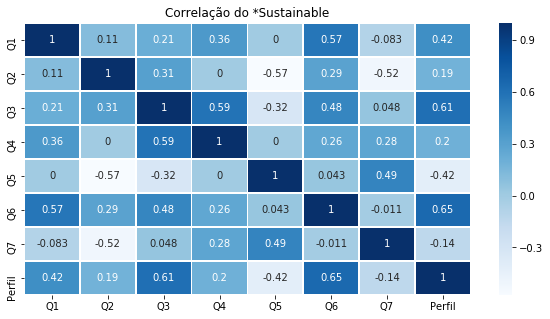

In [159]:
%matplotlib inline
data = (train_profile)
plt.figure(figsize=(10,5))
plt.title('Correlação do *Sustainable')
sns.heatmap(data.corr(),annot=True,linewidths=0.5,cmap='Blues')
print('Legenda:')
print('*São questões usadas para definir um perfil de investidor')

In [ ]:
#Parte dos FII

In [129]:
finance_train = pd.read_csv("FundosTrain.csv")

In [130]:
finance_train['Ticker'] = finance_train['Ticker'] + ".SA"

In [131]:
startDate = '2013-01-01'
volatibilidade = [];
rentabilidade = [];

for i in finance_train['Ticker']:
    read_data = data.DataReader(i,start = startDate,data_source = "yahoo")
    close = read_data['Close']
    rentail = read_data['Adj Close']
    volatibilidade.append(close.var())
    rentabilidade.append(((rentail/rentail.shift(1))-1).mean()*250)
    
finance_train["Volatibilidade"] = volatibilidade

finance_train["Rentabilidade Anual"] = rentabilidade

In [ ]:
finance_train.head()

In [132]:
finance_train = finance_train.drop(columns=['Público Alvo','DY no Ano','Nome','Preço de Cálculo DY','Preço Anterior','Valor Patrimonial','Patrimônio Líquido'])

In [133]:
finance_train = finance_train.fillna(0)

In [134]:
finance_train['Variação em % no Dia'] = finance_train['Variação em % no Dia'].apply(lambda x: float(x[:4].replace(',','.')))

In [135]:
finance_train['Valorização da Cota no Mês'] = finance_train['Valorização da Cota no Mês'].apply(lambda x:float(x[:4].replace(',','.')))

In [136]:
finance_train['DY Médio  (12 meses)'] = finance_train['DY Médio  (12 meses)'].apply(lambda x:float(x[:4].replace(',','.')))

In [137]:
finance_train['Rentabilidade no mês'] = finance_train['Rentabilidade no mês'].apply(lambda x:float(x[:4].replace(',','.')))

In [138]:
finance_train['P/VPA'] = finance_train['P/VPA'].apply(lambda x:float(x.replace(',','.')))

In [139]:
#Relaxado como padrão de FII
finance_train['Perfil'] = 6

In [140]:
#Ultraconservador
finance_train.loc[(finance_train['Volatibilidade'] < 1.0) & (finance_train['Variação em % no Dia'] < 0.5) & (finance_train['Valorização da Cota no Mês'] < 0.5),'Perfil'] = 1

In [141]:
#Conservador de mente aberta
finance_train.loc[(finance_train['Volatibilidade'] <= 3.0) & (finance_train['Variação em % no Dia'] < 1.0) & (finance_train['Valorização da Cota no Mês'] > 1.0),'Perfil'] = 2

In [142]:
#Oportunista
finance_train.loc[(finance_train['Volatibilidade'] > 4.0) & (finance_train['Variação em % no Dia'] > 2.0) & (finance_train['Valorização da Cota no Mês'] < 3.0),'Perfil'] = 4

In [143]:
#Especulador
finance_train.loc[(finance_train['Volatibilidade'] > 5.0) &  (finance_train['Valorização da Cota no Mês'] > 5 ),'Perfil'] = 5

In [144]:
#Arrojado
finance_train.loc[(finance_train['Volatibilidade'] > 3.0) & (finance_train['Variação em % no Dia'] < 4.0) & (finance_train['Valorização da Cota no Mês'] > 7.0),'Perfil'] = 3

In [145]:
#Relaxado
relaxado = finance_train.loc[(finance_train['Volatibilidade'] < 3.0) & (finance_train['Variação em % no Dia'] < 5.0)]

In [146]:
#Dummmy Segmento
dummy_segmento = pd.get_dummies(finance_train['Segmento'])
finance_train = pd.concat([finance_train,dummy_segmento],axis=1)

In [158]:
segmento = finance_train.drop(columns=['Segmento'])

In [159]:
ticker = finance_train.drop(columns=['Ticker']) 

In [160]:
finance_train.head()

,Ticker,Segmento,Variação em % no Dia,Valorização da Cota no Mês,DY Médio (12 meses),Rentabilidade no mês,P/VPA,Volatibilidade,Rentabilidade Anual,Perfil,Hotel,Híbrido,Lajes Corporativas,Logística,Outros,Shoppings,Títulos e Val. Mob.
0,FPAB11.SA,Lajes Corporativas,0.45,3.54,0.51,4.00,1.08,765.045914,0.087557,6,0,0,1,0,0,0,0
1,ABCP11.SA,Shoppings,0.52,0.40,0.49,0.92,1.27,357.651956,0.186209,6,0,0,0,0,0,1,0
2,BPFF11.SA,Títulos e Val. Mob.,0.60,3.53,0.67,4.15,1.10,153.980611,0.090189,6,0,0,0,0,0,0,1
3,ALZR11.SA,Logística,1.35,1.51,0.59,1.95,1.20,33.069399,0.073207,6,0,0,0,1,0,0,0
4,FAMB11B.SA,Lajes Corporativas,0.92,3.37,1.14,4.31,0.93,853034.710173,0.023535,6,0,0,1,0,0,0,0


In [150]:
X_perfis = finance_train[['Variação em % no Dia','Valorização da Cota no Mês','DY Médio  (12 meses)','Rentabilidade no mês','P/VPA','Volatibilidade','Rentabilidade Anual','Hotel','Híbrido','Lajes Corporativas','Logística','Outros','Shoppings','Títulos e Val. Mob.']]

In [151]:
y_perfis = finance_train['Perfil']

In [59]:
#Grid Search Tree Desicion
from sklearn.model_selection import GridSearchCV
from sklearn import tree
tree = tree.DecisionTreeClassifier()
parameters = {'max_depth':range(1,100),'criterion':['gini','entropy'],'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
grid = GridSearchCV(tree,parameters,cv=2)
grid.fit(X_perfis,y_perfis)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [60]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=1,min_samples_split=4)
tree_model.fit(X_perfis,y_perfis)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
tree_model.score(X_perfis,y_perfis)

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, X_perfis, y_perfis , cv=6)
scores

C:\Users\anacarla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.



array([0.75      , 1.        , 0.90909091, 1.        , 1.        ,
       0.85714286])

In [ ]:
scores.mean()

In [8]:
trace = go.Bar(x=['Tree Decision'], y =[93.32]
               ,width=[0.3],marker_color='rgb(60, 99, 130)')
layout = go.Layout(title='Modelo treinado de acordo com o parametro do Grid Search'
                   ,xaxis={'title':'Modelo'},yaxis={'title':'Acurácia(%)'})
data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

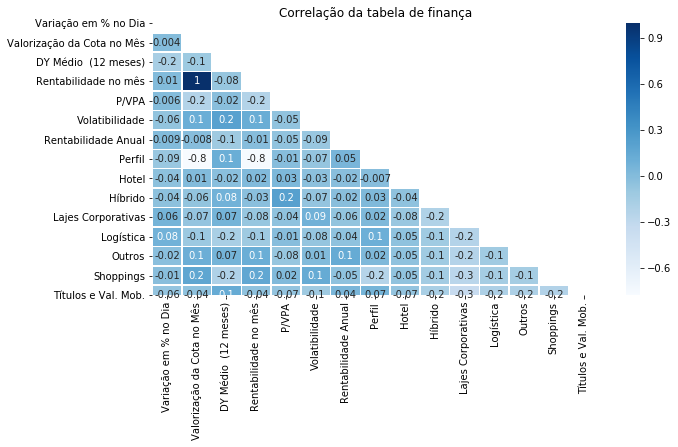

In [54]:
%matplotlib inline
data = (finance_train)
plt.figure(figsize=(10,5))
plt.title('Correlação da tabela de finança')
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot=True,linewidths=0.5,
            cmap='Blues',fmt = '.1g',mask=matrix,)

In [ ]:
#Scores de acordo com o cross validation
#Tree Decision = 93.32%

In [62]:
from joblib import dump, load
dump(tree_model, 'Profiles_Finance.joblib')

['Profiles_Finance.joblib']

In [152]:
tree_model = load('Profiles_Finance.joblib')

In [153]:
def profile_print(val):
    if val == 1:
           imp = print('Ultraconservador')
    elif val == 2:
        imp = print('Conservador de Mente Aberta')
    elif val == 3:
        imp = print('Arrojado')
    elif val == 4:
        imp = print('Oportunista')
    elif val == 5:
        imp = print('Especulador')
    else:
        imp = print('Especulador')
    return imp

In [154]:
#Coloca as respostas das questões dentro do predict
val = tree_model_profile.predict([[2,1,2,2,3,29,2]])[0]

In [161]:
finance_train['Ticker'] = segmento

In [162]:
finance_train['Segmento'] = ticker

In [163]:
profile_recommend = finance_train.loc[(finance_train['Perfil'] == val)]

In [164]:
print('Recomendação para o seu perfil de investidor:')
profile_print(val)
profile_recommend = profile_recommend[['Ticker','Segmento','Rentabilidade Anual']]
profile_recommend.head()

Recomendação para o seu perfil de investidor:
Arrojado


,Ticker,Segmento,Rentabilidade Anual
10,CBOP11.SA,Lajes Corporativas,0.073166
17,HGPO11.SA,Lajes Corporativas,0.253267
18,HGBS11.SA,Shoppings,0.060511
22,PQDP11.SA,Shoppings,0.214191
25,HCTR11.SA,Outros,0.628181
